In [20]:
# Magic to automatically update imports if functions in utils are changed
%load_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
from sklearn.model_selection import train_test_split

stores_train = pd.read_csv("data/stores_train.csv")
stores_train, stores_val = train_test_split(stores_train, test_size=0.2, random_state=0)

In [7]:
relevant_cols = ["store_id", "plaace_hierarchy_id", "revenue"]

stores_train = stores_train[relevant_cols]
stores_val = stores_val[relevant_cols]

In [8]:
from utils import split_plaace_cat

stores_train = split_plaace_cat(stores_train)
stores_val = split_plaace_cat(stores_val)

# Plotting the standard deviation and count

## Plaace_1

In [90]:
plaace_1_dfs = {}

for plaace_1 in stores_train.plaace_cat_1.unique():
    plaace_1_dfs[plaace_1] = stores_train[stores_train.plaace_cat_1 == plaace_1]

plaace_1_dfs_rev_std = {}
plaace_1_dfs_count = {}

for df_name, df in plaace_1_dfs.items():
    plaace_1_dfs_rev_std[df_name] = df.revenue.std()
    plaace_1_dfs_count[df_name] = df.shape[0]

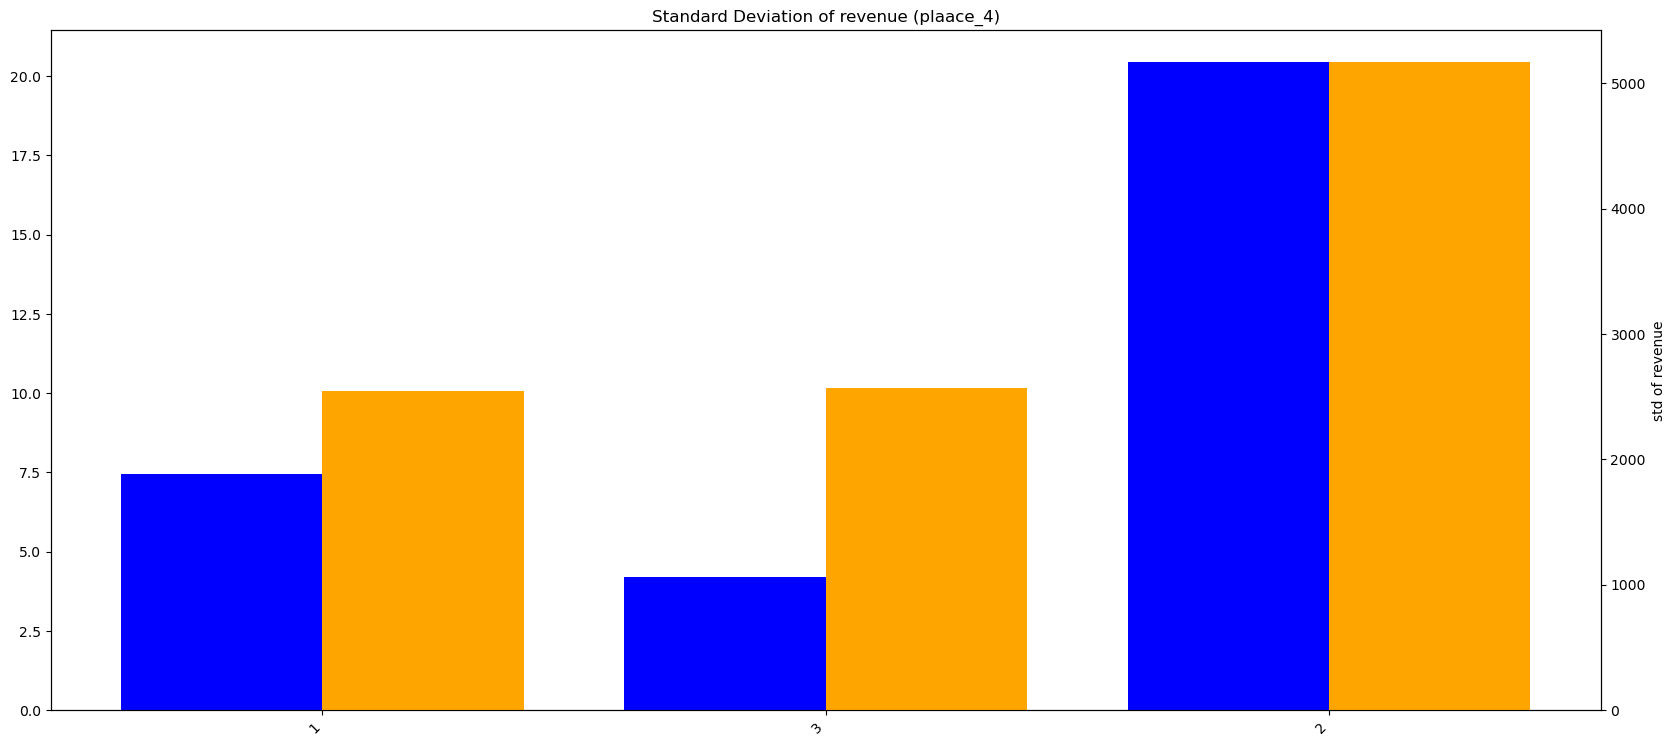

In [91]:
fig = plt.figure(figsize=(20, 10))
fig.autofmt_xdate(rotation=45)
ax = fig.add_subplot(111)
ax2 = ax.twinx()

x_ticks = np.arange(len(plaace_1_dfs.keys()))

width = 0.4

ax.bar(x_ticks - width/2, plaace_1_dfs_rev_std.values(), width=width, color="blue")
ax2.bar(x_ticks + width/2, plaace_1_dfs_count.values(), width=width, color="orange")

ax.set_xticks(x_ticks)
ax.set_xticklabels(plaace_1_dfs.keys(), rotation = 45, ha="right")

plt.title("Standard Deviation of revenue (plaace_4)")
plt.xlabel("plaace_cat_4")
plt.ylabel("std of revenue")
plt.show();

## Plaace_2

In [85]:
plaace_2_dfs = {}

for plaace_2 in stores_train.plaace_cat_2.unique():
    plaace_2_dfs[str(plaace_2)] = stores_train[stores_train.plaace_cat_2 == plaace_2]

plaace_2_dfs_rev_std = {}
plaace_2_dfs_count = {}

for df_name, df in plaace_2_dfs.items():
    plaace_2_dfs_rev_std[df_name] = df.revenue.std()
    plaace_2_dfs_count[df_name] = df.shape[0]

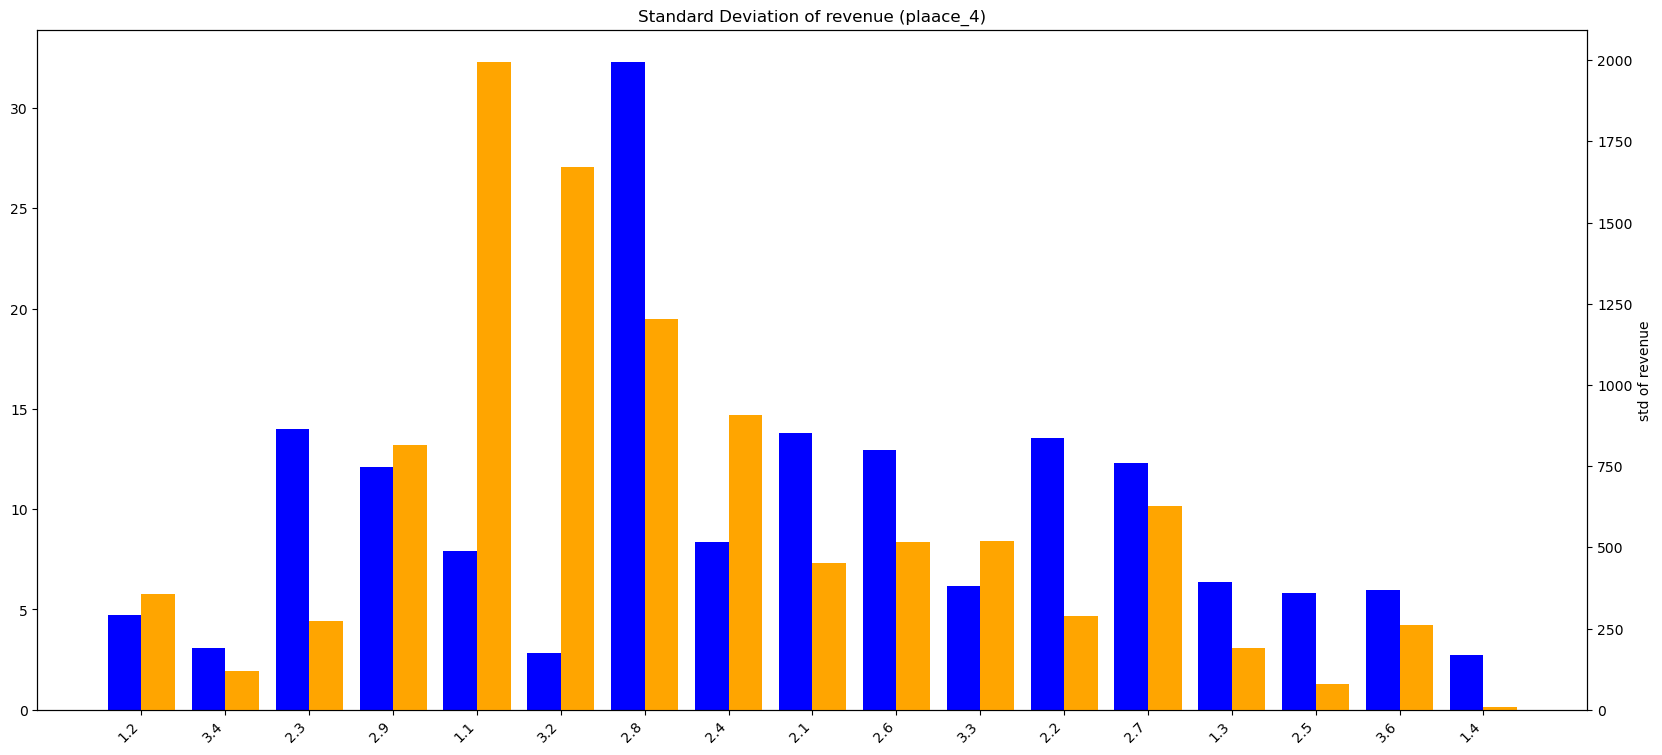

In [87]:
fig = plt.figure(figsize=(20, 10))
fig.autofmt_xdate(rotation=45)
ax = fig.add_subplot(111)
ax2 = ax.twinx()

x_ticks = np.arange(len(plaace_2_dfs.keys()))

width = 0.4

ax.bar(x_ticks - width/2, plaace_2_dfs_rev_std.values(), width=width, color="blue")
ax2.bar(x_ticks + width/2, plaace_2_dfs_count.values(), width=width, color="orange")

ax.set_xticks(x_ticks)
ax.set_xticklabels(plaace_2_dfs.keys(), rotation = 45, ha="right")

plt.title("Standard Deviation of revenue (plaace_4)")
plt.xlabel("plaace_cat_4")
plt.ylabel("std of revenue")
plt.show();

## Plaace 3

In [83]:
plaace_3_dfs = {}

for plaace_3 in stores_train.plaace_cat_3.unique():
    plaace_3_dfs[str(plaace_3)] = stores_train[stores_train.plaace_cat_3 == plaace_3]

plaace_3_dfs_rev_std = {}
plaace_3_dfs_count = {}

for df_name, df in plaace_3_dfs.items():
    plaace_3_dfs_rev_std[df_name] = df.revenue.std()
    plaace_3_dfs_count[df_name] = df.shape[0]

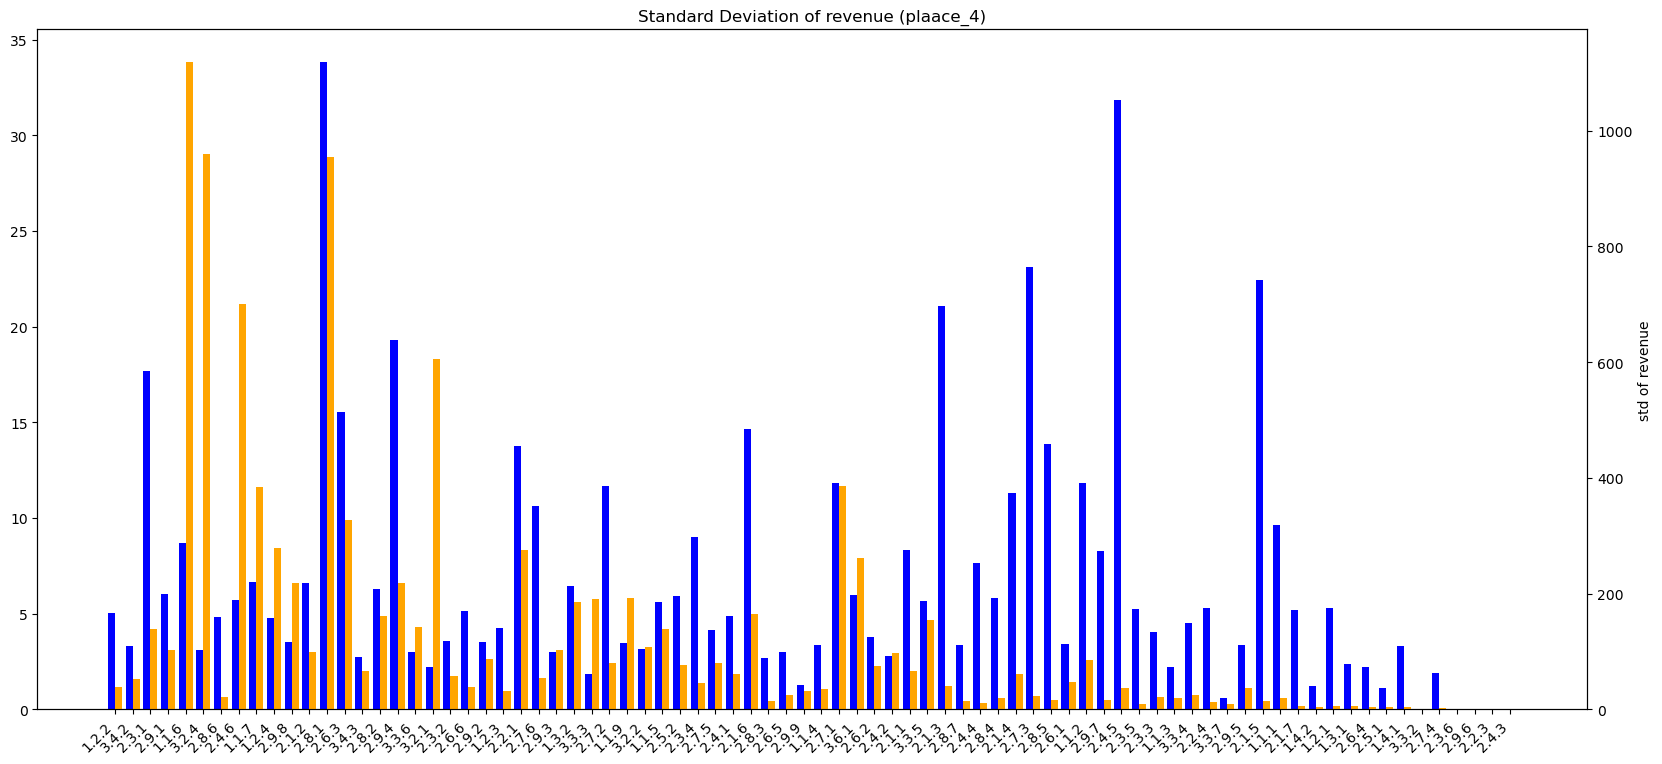

In [84]:
fig = plt.figure(figsize=(20, 10))
fig.autofmt_xdate(rotation=45)
ax = fig.add_subplot(111)
ax2 = ax.twinx()

x_ticks = np.arange(len(plaace_3_dfs.keys()))

width = 0.4

ax.bar(x_ticks - width/2, plaace_3_dfs_rev_std.values(), width=width, color="blue")
ax2.bar(x_ticks + width/2, plaace_3_dfs_count.values(), width=width, color="orange")

ax.set_xticks(x_ticks)
ax.set_xticklabels(plaace_3_dfs.keys(), rotation = 45, ha="right")

plt.title("Standard Deviation of revenue (plaace_4)")
plt.xlabel("plaace_cat_4")
plt.ylabel("std of revenue")
plt.show();

## Plaace_4

In [41]:
plaace_4_dfs = {}

for plaace_4 in stores_train.plaace_cat_4.unique():
    plaace_4_dfs[str(plaace_4)] = stores_train[stores_train.plaace_cat_4 == plaace_4]

plaace_4_dfs_rev_std = {}
plaace_4_dfs_count = {}

for df_name, df in plaace_4_dfs.items():
    plaace_4_dfs_rev_std[df_name] = df.revenue.std()
    plaace_4_dfs_count[df_name] = df.shape[0]

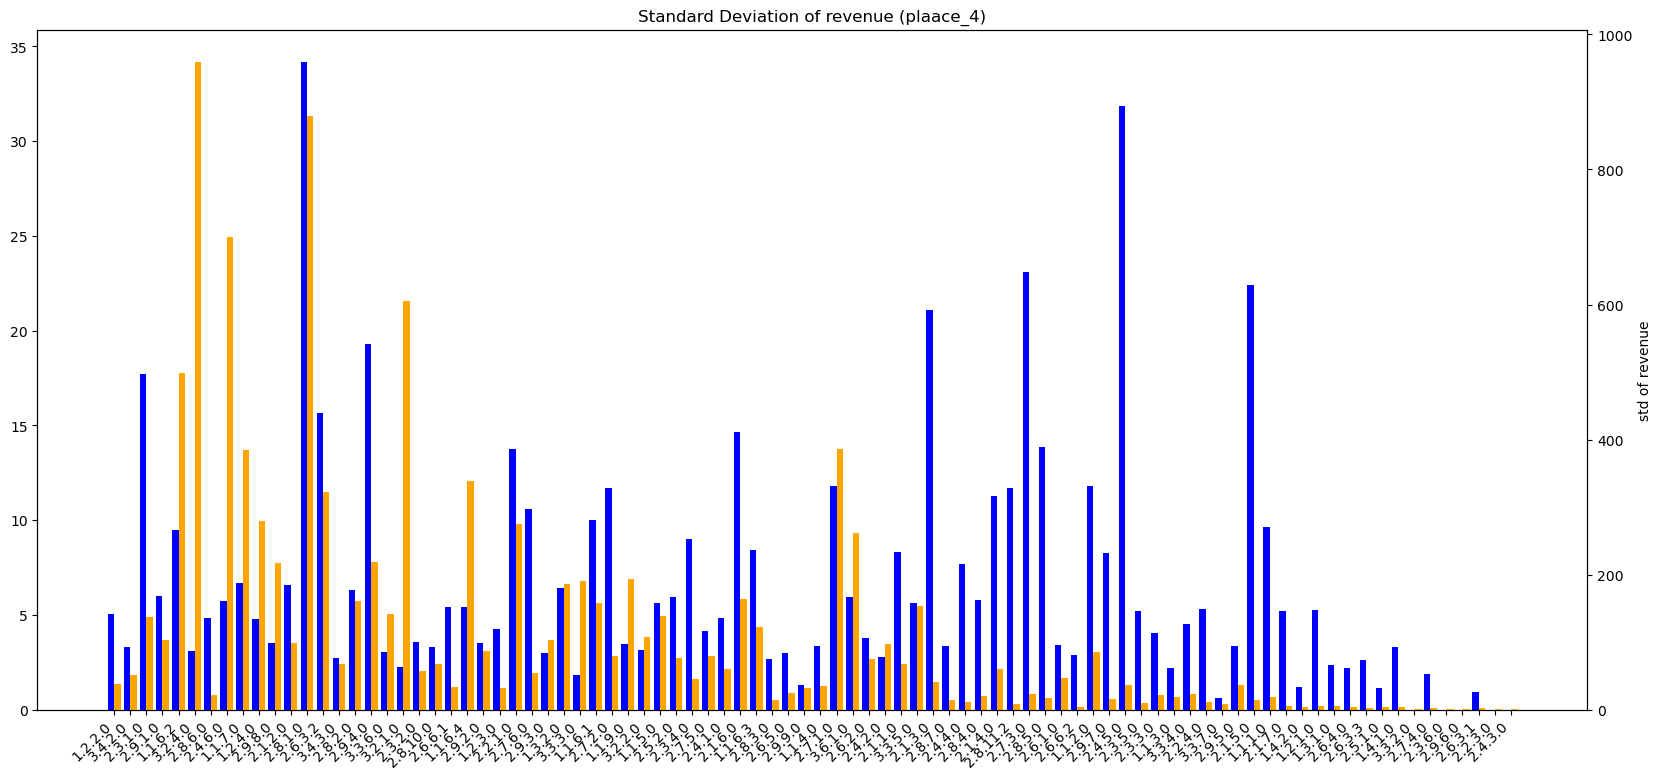

In [80]:
fig = plt.figure(figsize=(20, 10))
fig.autofmt_xdate(rotation=45)
ax = fig.add_subplot(111)
ax2 = ax.twinx()

x_ticks = np.arange(len(plaace_4_dfs.keys()))

width = 0.4

ax.bar(x_ticks - width/2, plaace_4_dfs_rev_std.values(), width=width, color="blue")
ax2.bar(x_ticks + width/2, plaace_4_dfs_count.values(), width=width, color="orange")

ax.set_xticks(x_ticks)
ax.set_xticklabels(plaace_4_dfs.keys(), rotation = 45, ha="right")

plt.title("Standard Deviation of revenue (plaace_4)")
plt.xlabel("plaace_cat_4")
plt.ylabel("std of revenue")
plt.show();

# Investigating plaace_cateogries (by values)

In [101]:
for k, v in plaace_1_dfs_rev_std.items():
    print(f"{k}: {v}")

1: 7.448827307931044
3: 4.211665273705158
2: 20.43092403563416


2 has wayyyy to high std, we need to go deeper. This is probably true for 1 aswell, and might be true for 3. Let's start by investigating plaace_cat_1 == 3

## Plaace_cat_1 == 3

In [114]:
for k, v in plaace_2_dfs_rev_std.items():
    if k.startswith("3."):
        print(f"{k}: {v} (count: {plaace_2_dfs_count[k]})")

3.4: 3.0667650970323783 (count: 119)
3.2: 2.834427270787851 (count: 1671)
3.3: 6.1567772003531305 (count: 521)
3.6: 5.95474070463328 (count: 261)


'3.4' and '3.2' seem really promising, although we don't have to many support vectors for '3.4'. For '3.3' and '3.6', we again need to go deeper.

### Plaace_cat_2 == 3.3

In [117]:
for k, v in plaace_3_dfs_rev_std.items():
    if k.startswith("3.3."):
        print(f"{k}: {v} (count: {plaace_3_dfs_count[k]})")

3.3.6: 3.023384988903953 (count: 142)
3.3.3: 1.855632536004927 (count: 191)
3.3.5: 5.6454164481438776 (count: 154)
3.3.4: 4.5024005028477285 (count: 24)
3.3.7: 0.6073102584346818 (count: 9)
3.3.2: nan (count: 1)


Most columns in '3.3' seem to sparse to use, but we can try extracting '3.3.3' while keeping the other as '3.3'.

### Plaace_cat_2 == 3.6

In [116]:
for k, v in plaace_3_dfs_rev_std.items():
    if k.startswith("3.6."):
        print(f"{k}: {v} (count: {plaace_3_dfs_count[k]})")

3.6.1: 5.95474070463328 (count: 261)


No need to go deeper on '3.6' as it only contains one category.

## Plaace_cat_1 == 1

In [119]:
for k, v in plaace_2_dfs_rev_std.items():
    if k.startswith("1."):
        print(f"{k}: {v} (count: {plaace_2_dfs_count[k]})")

1.2: 4.743068468620142 (count: 355)
1.1: 7.922695340584738 (count: 1994)
1.3: 6.385236508194728 (count: 191)
1.4: 2.7317341953941483 (count: 8)


Not really a lot to get from this. '1.4' is way too small and should just be part of '1'. '1.2' is the only one that seems slightly more promising, but maybe we can do better there as well. Let's investigate.

## Plaace_cat_1 == 2